In [1]:
%run tools.ipynb

In [2]:
# look through all NOAA insitu measurements,
# find corresponding model results
# store the values in the same file

In [3]:
year = 2018
# model directory and file
mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018/OutputDir/'
mod_file = 'SpeciesConc.2018.nc'


[-155.5763, 19.5362]

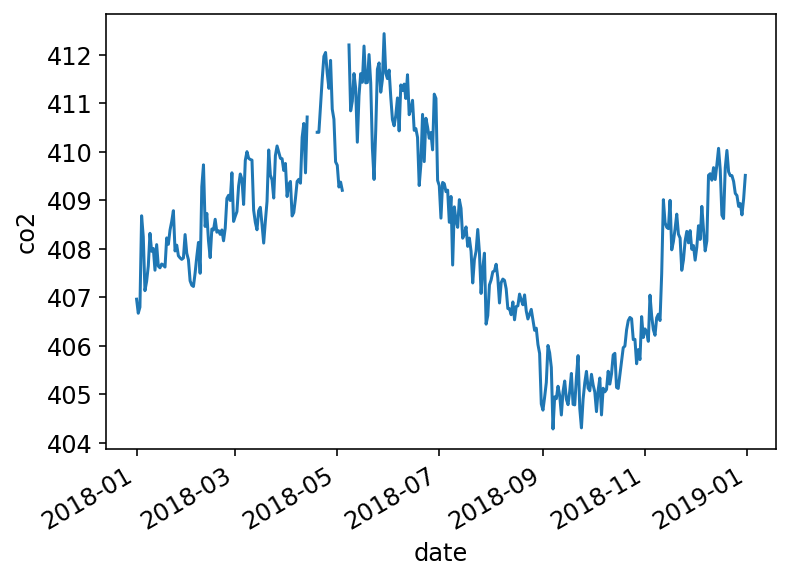

In [4]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
filename = '2018_daily_MLO.nc'
ds_obs = xr.open_dataset(file_dir + filename)
ds_obs['co2'].plot()
lon = ds_obs.attrs['site_longitude']
lat = ds_obs.attrs['site_latitude']
[lon,lat]


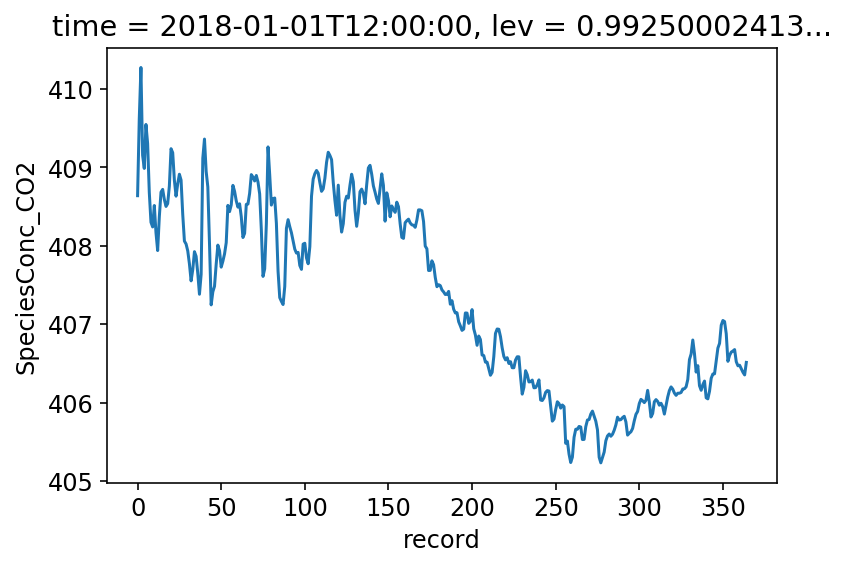

In [5]:
# read model output
ds_mod = xr.open_dataset(mod_dir + mod_file)
dr = ds_mod['SpeciesConc_CO2']
daily_co2_mod = dr[:,0,0,:,:]
ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6
ts_model.plot()

In [6]:
ds_obs['obs'] = ds_obs['co2']
ds_obs['mod'] = ds_obs['co2']
ds_obs['mod'].values = ts_model.values

obs_series = ds_obs['obs'].values
model_series = ds_obs['mod'].values
R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

x = obs_series[~np.isnan(obs_series)]
y = model_series[~np.isnan(obs_series)]
rmse = np.sqrt(((y - x) ** 2).mean())
format_R = float("{0:.2f}".format(R[0,1]))
format_rmse = float("{0:.2f}".format(rmse))

print('R is:', format_R, ' RMSE is: ', format_rmse)
    

R is: 0.72  RMSE is:  1.67


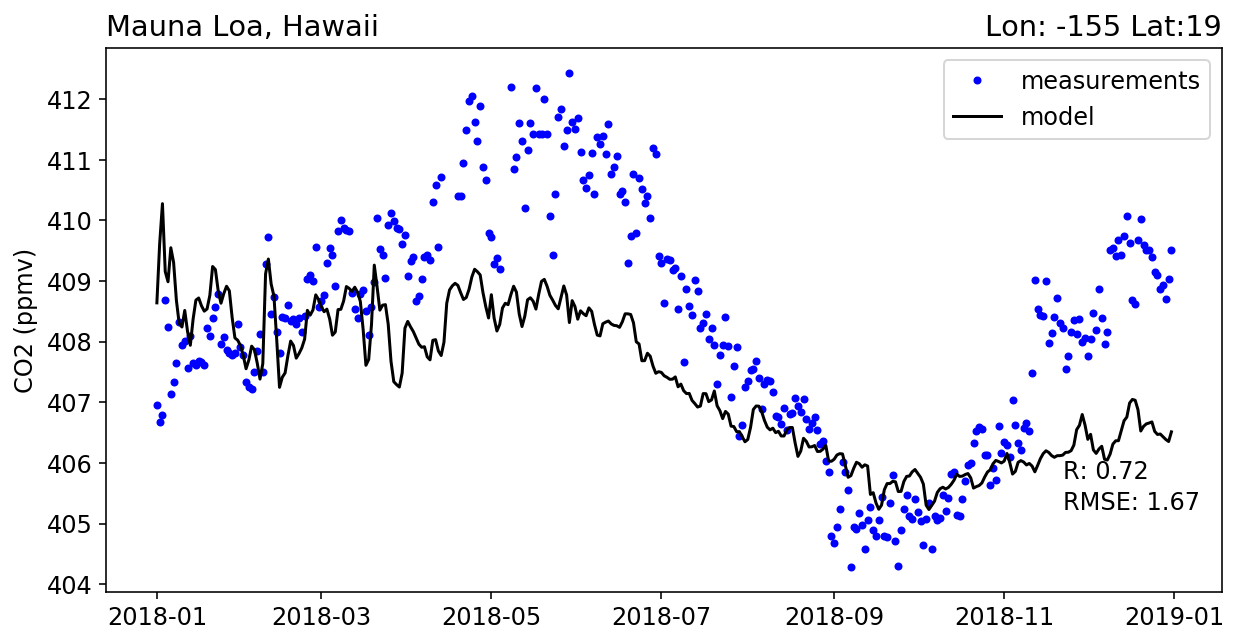

In [7]:
fig = plt.figure(figsize=[10,5])
plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
plt.legend()
plt.title(ds_obs.attrs['site_name'], loc='left') 
plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
plt.ylabel('CO2 (ppmv)')

incr = 0.1*(max(ds_obs['mod'].values) - min(ds_obs['mod'].values))
plt.text(x=ds_obs.date[-40], y=min(ds_obs['mod'].values)+incr, s='R: ' + str(format_R), size = 12)
plt.text(x=ds_obs.date[-40], y=min(ds_obs['mod'].values), s='RMSE: ' + str(format_rmse), size = 12)
        
        
fig.savefig(file_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)

In [8]:
# do the above calculations for all of sites

In [9]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames_2018', 'r')
lines = file1.readlines()

R is: 0.68  RMSE is:  4.49
R is: 0.09  RMSE is:  11.93
R is: 0.81  RMSE is:  3.42
R is: 0.71  RMSE is:  10.03
R is: 0.06  RMSE is:  19.89
R is: 0.93  RMSE is:  11.77
R is: 0.67  RMSE is:  15.46
R is: 0.64  RMSE is:  5.78
R is: 0.73  RMSE is:  7.88
R is: 0.5  RMSE is:  17.26
R is: 0.54  RMSE is:  4.2
R is: 0.67  RMSE is:  5.68
R is: 0.7  RMSE is:  6.8
R is: 0.52  RMSE is:  14.86
R is: 0.36  RMSE is:  5.96
R is: 0.84  RMSE is:  12.63
R is: -0.01  RMSE is:  1.28
R is: 0.53  RMSE is:  9.82
R is: 0.66  RMSE is:  9.7
R is: 0.22  RMSE is:  3.53
R is: 0.53  RMSE is:  4.74
R is: 0.61  RMSE is:  4.97
R is: 0.4  RMSE is:  10.6
R is: -0.17  RMSE is:  29.16
R is: 0.46  RMSE is:  8.89
R is: 0.62  RMSE is:  5.84
R is: 0.72  RMSE is:  6.8
R is: 0.68  RMSE is:  8.2


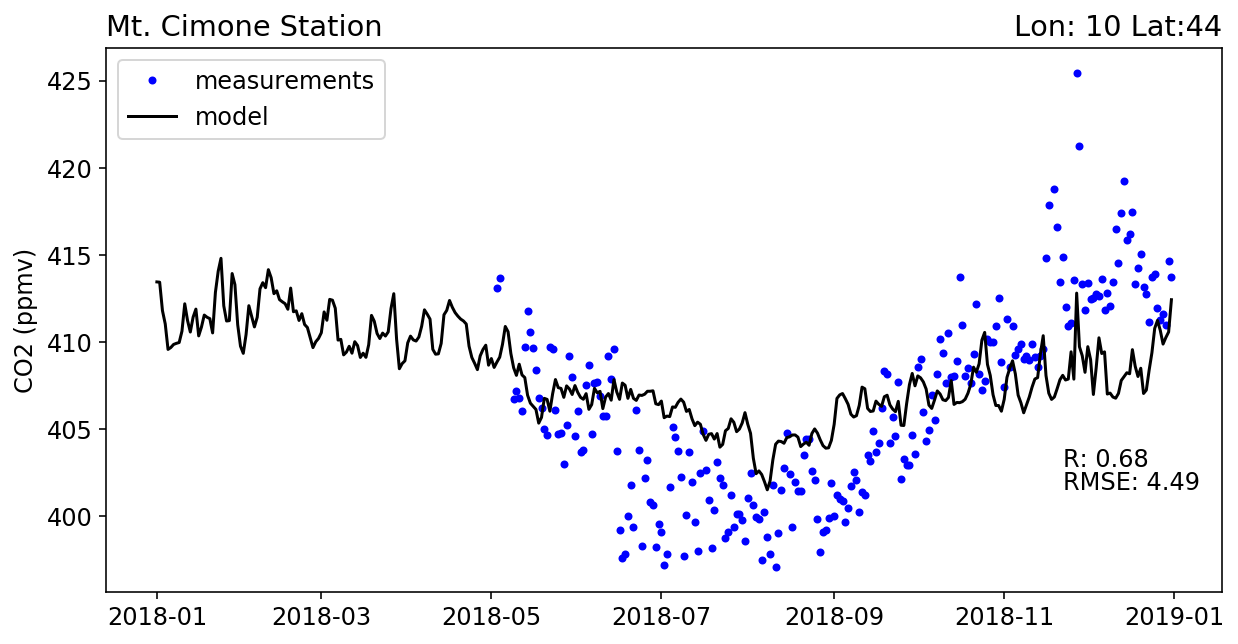

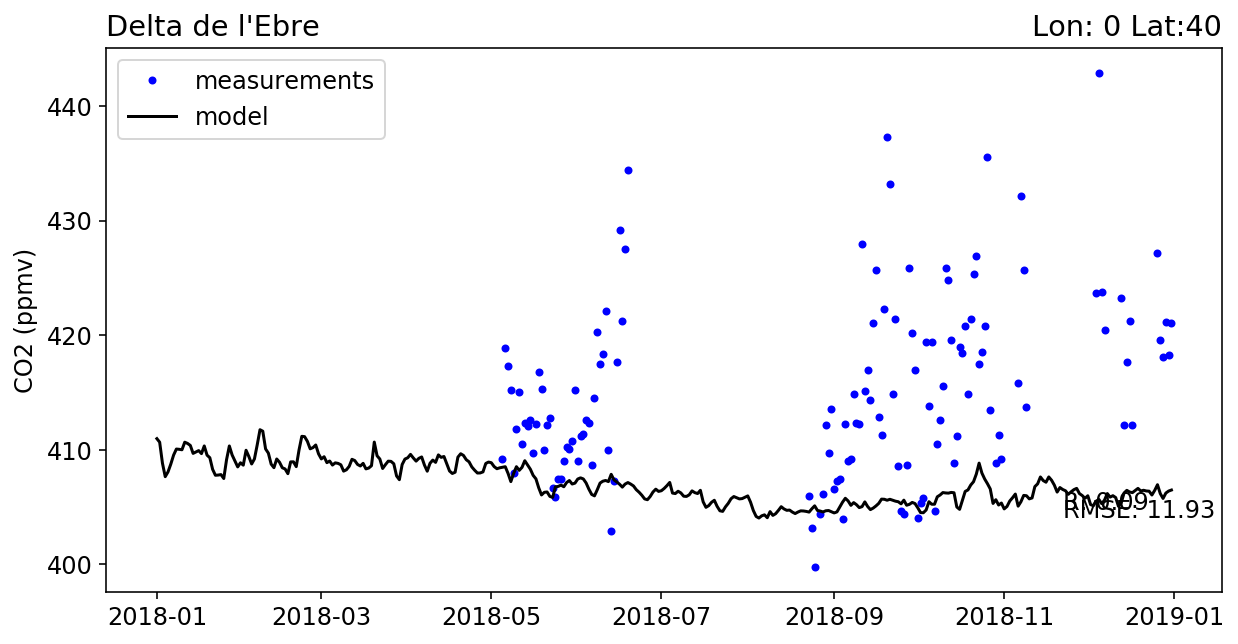

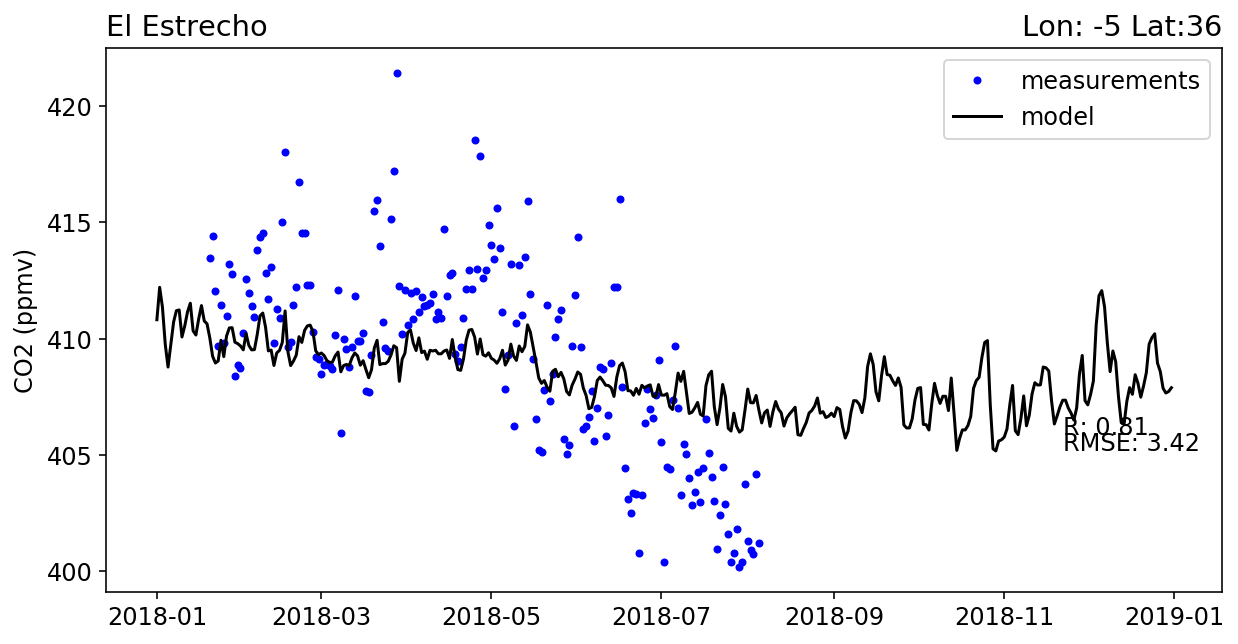

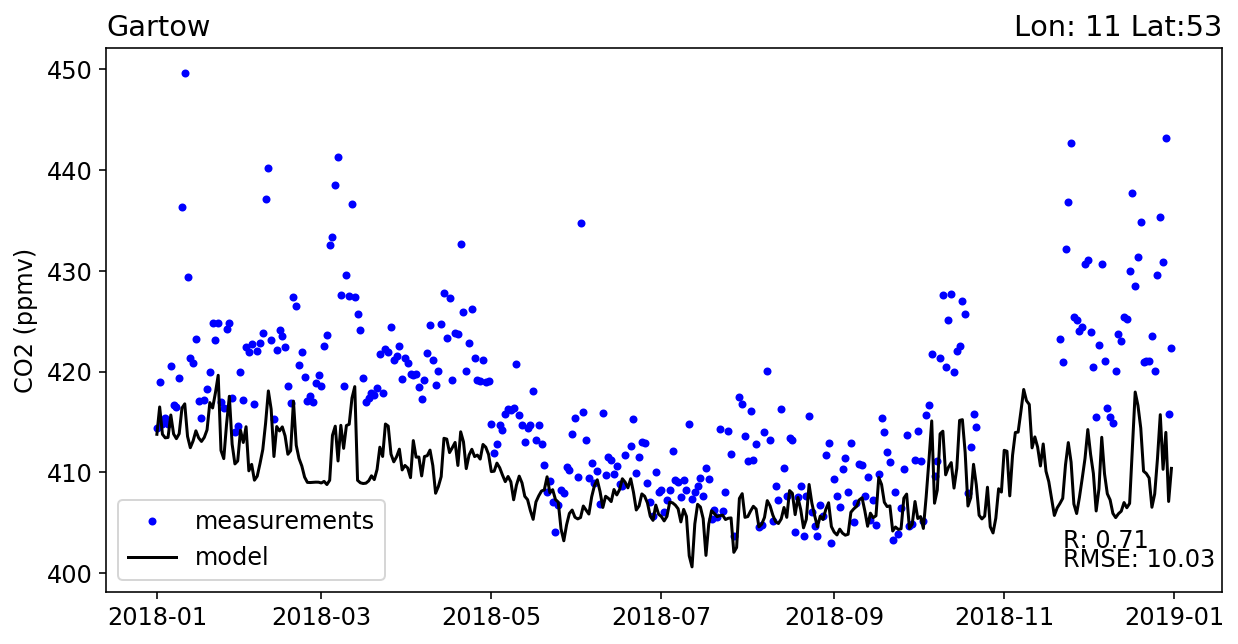

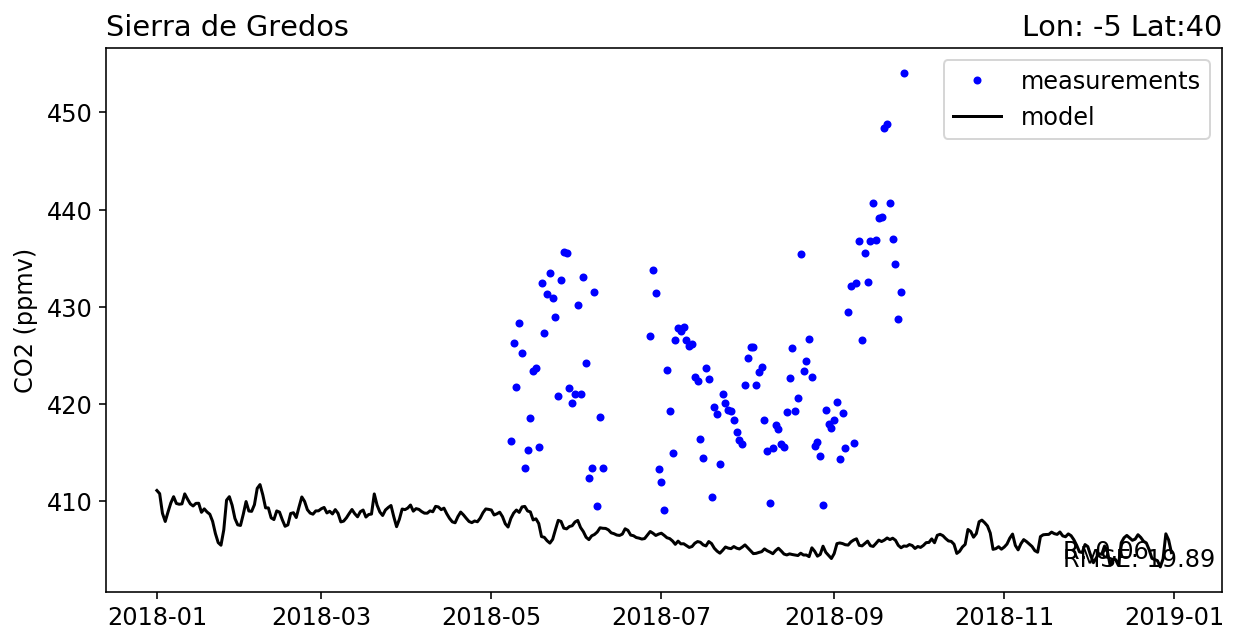

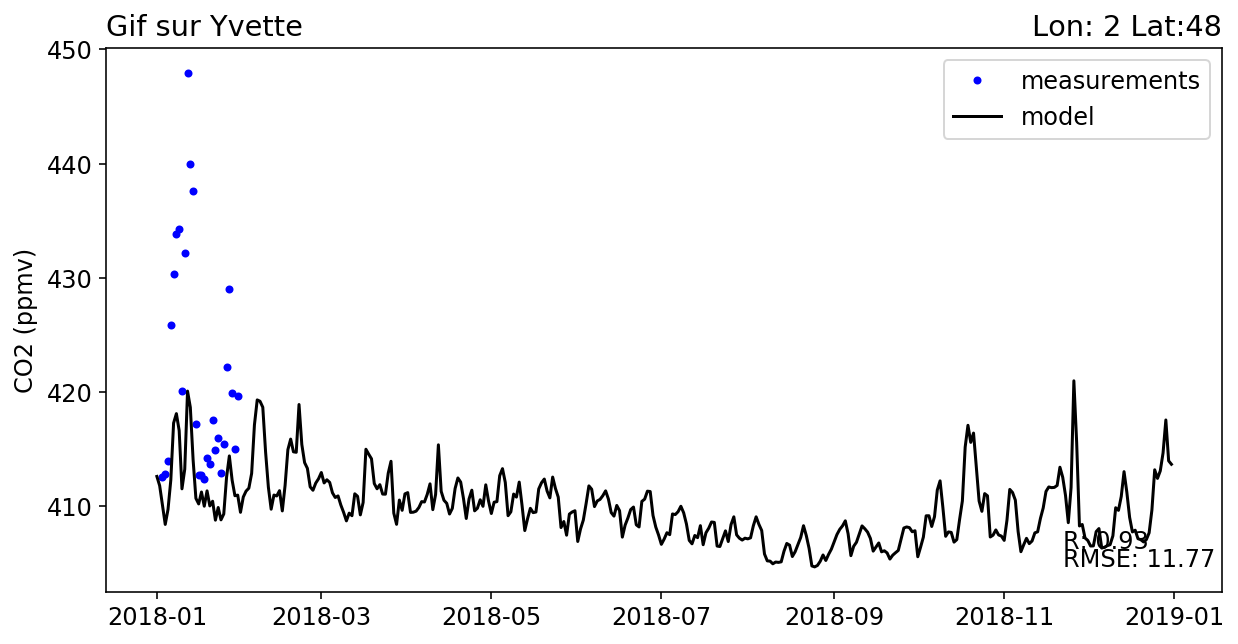

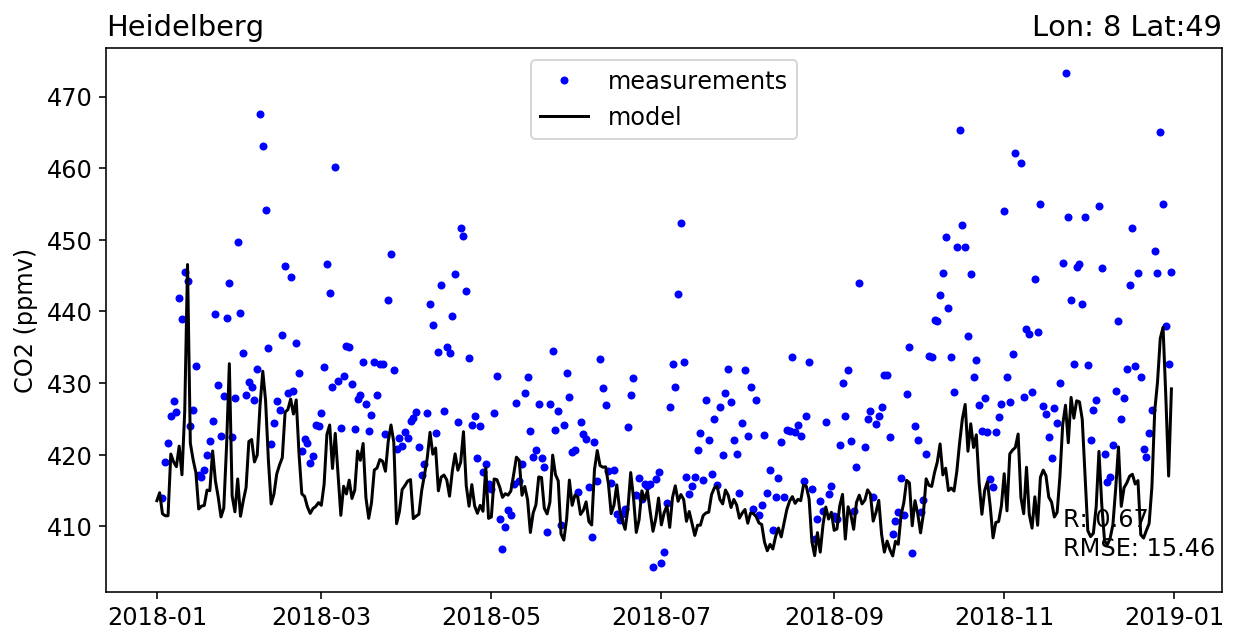

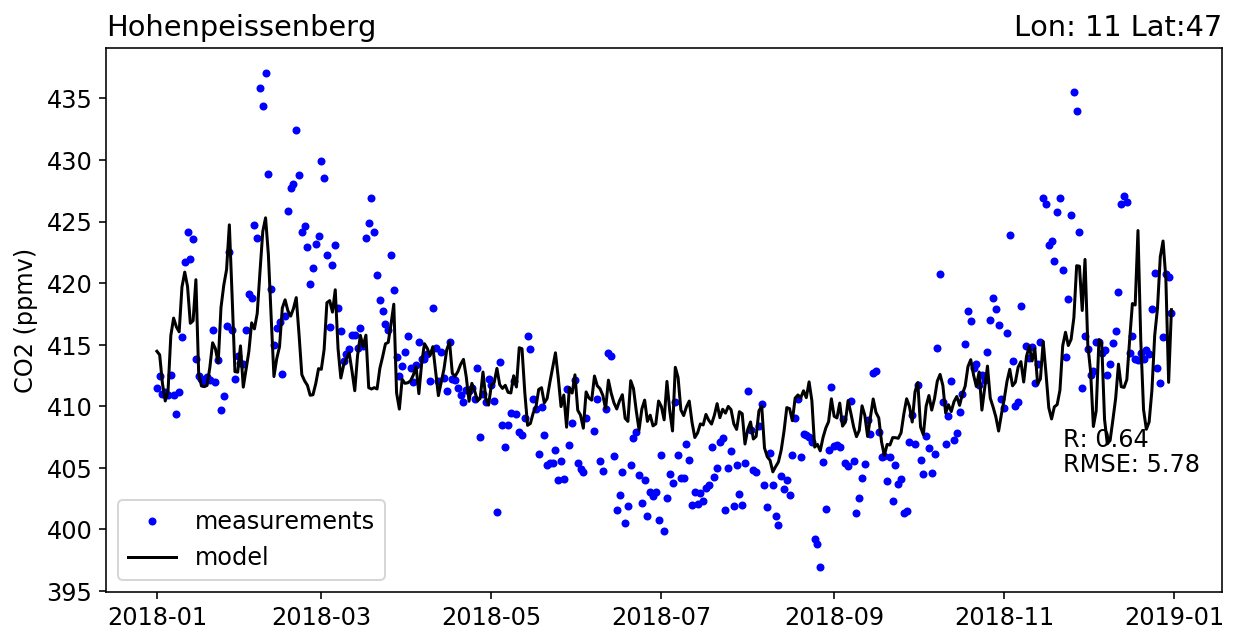

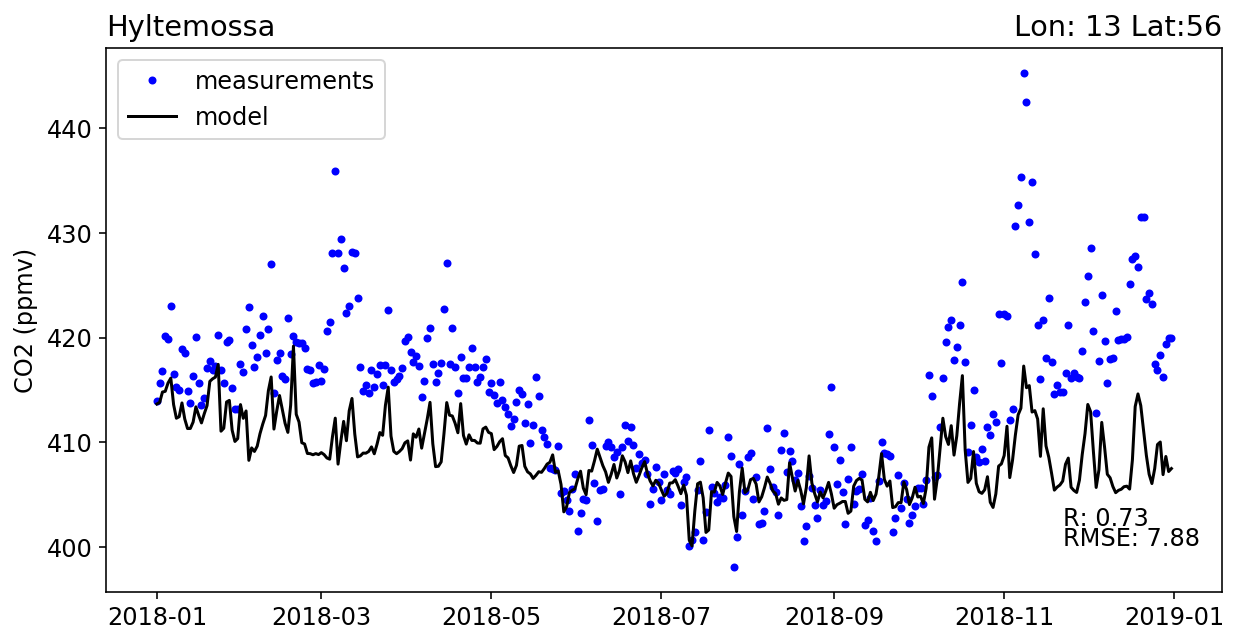

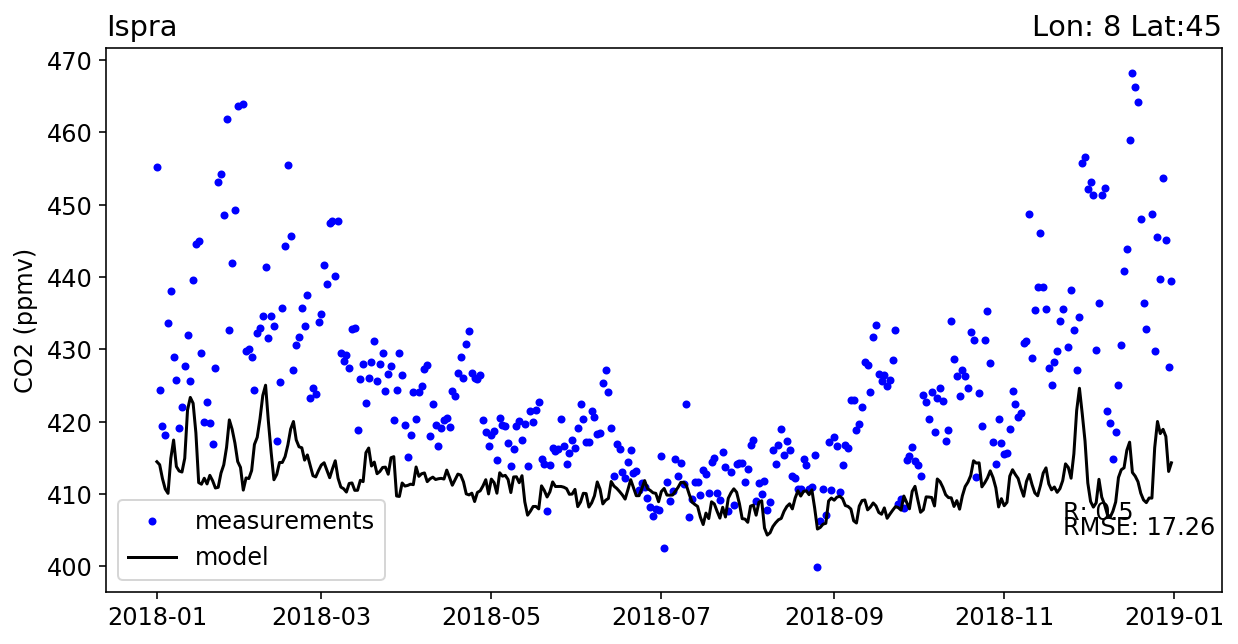

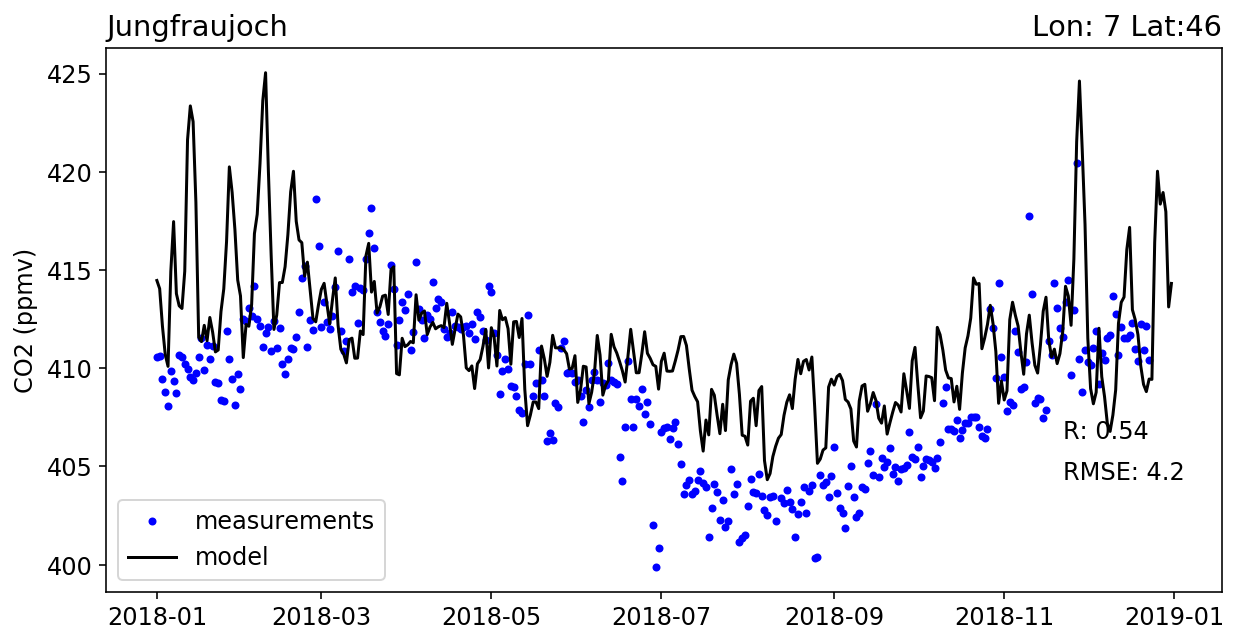

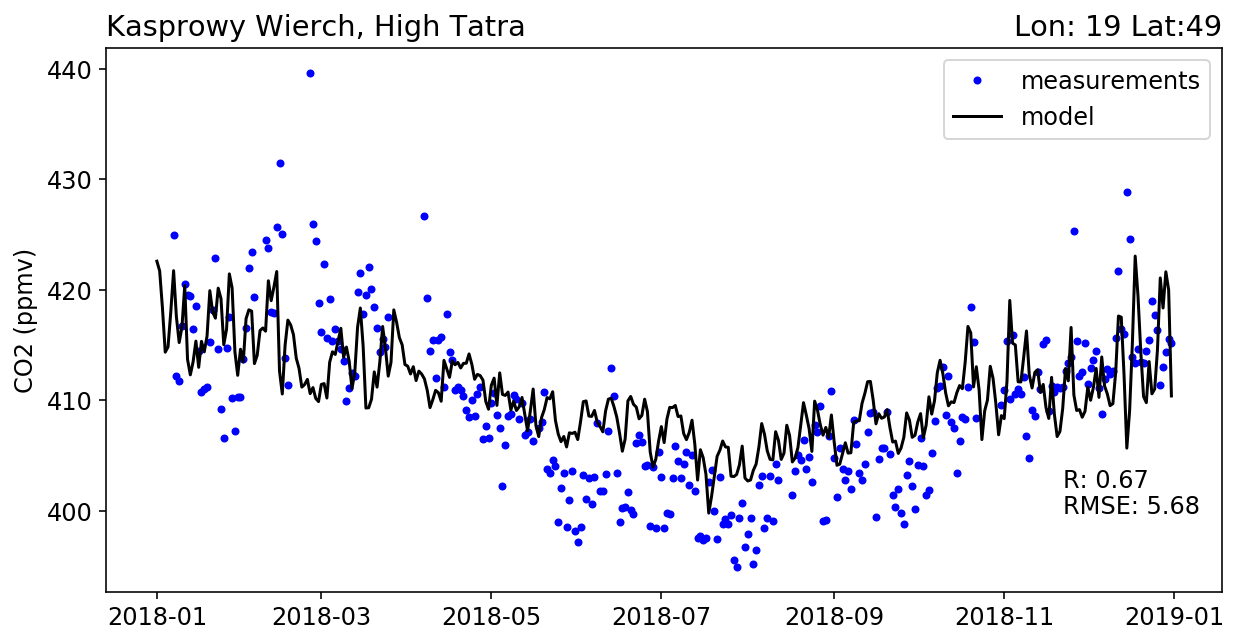

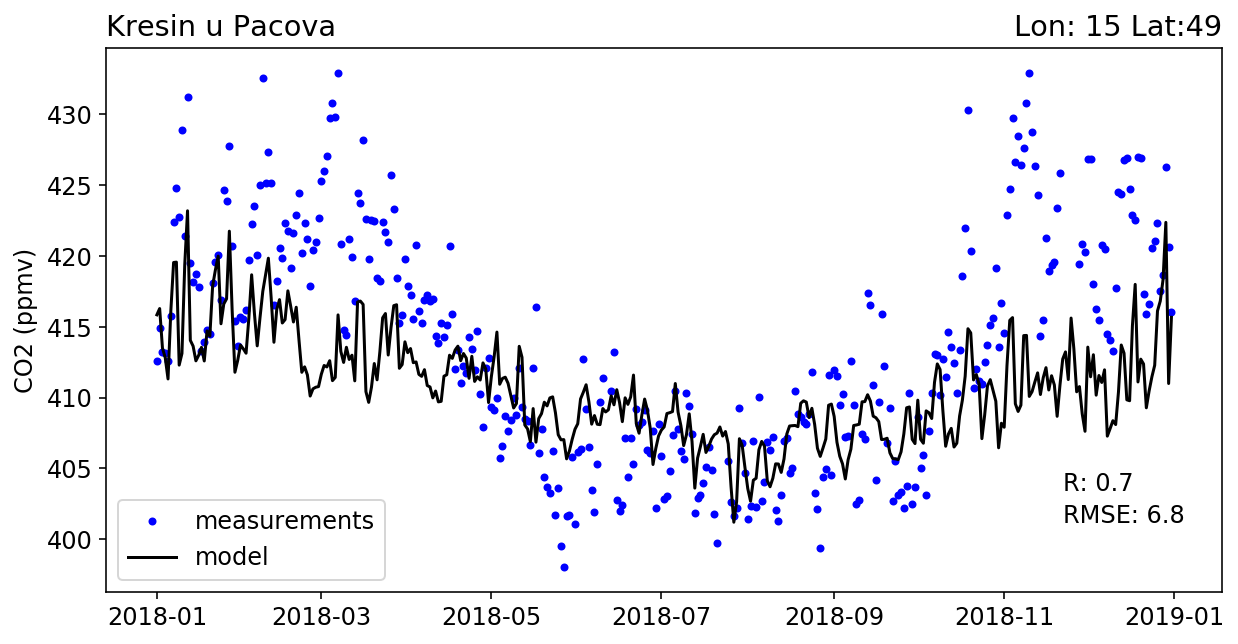

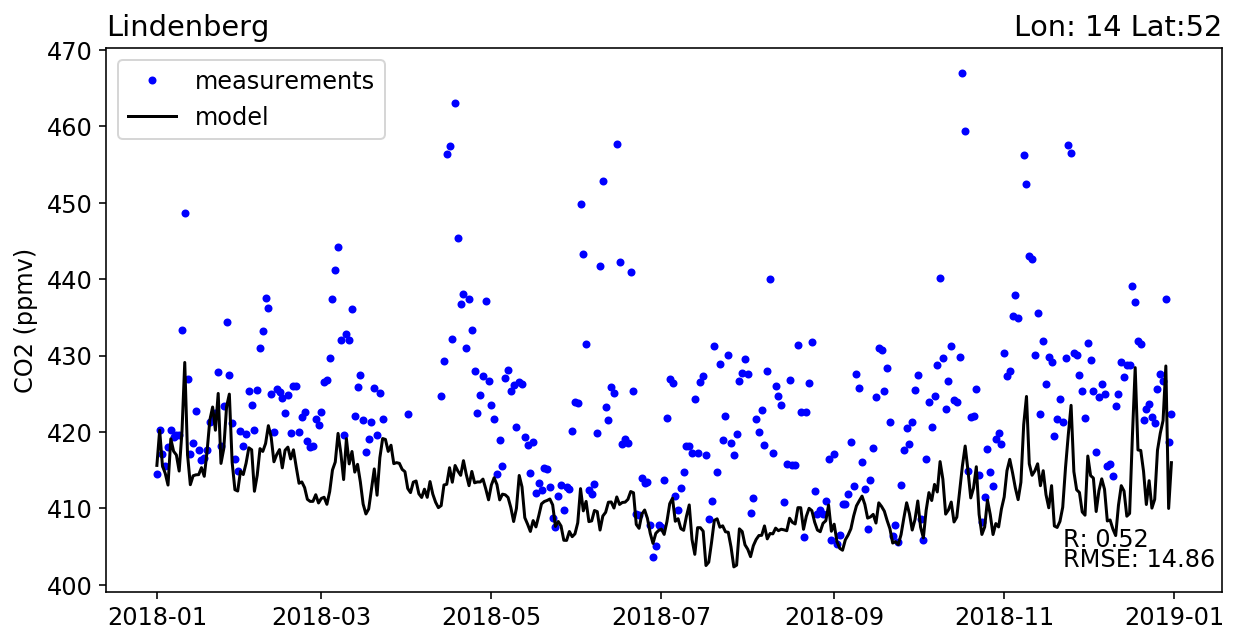

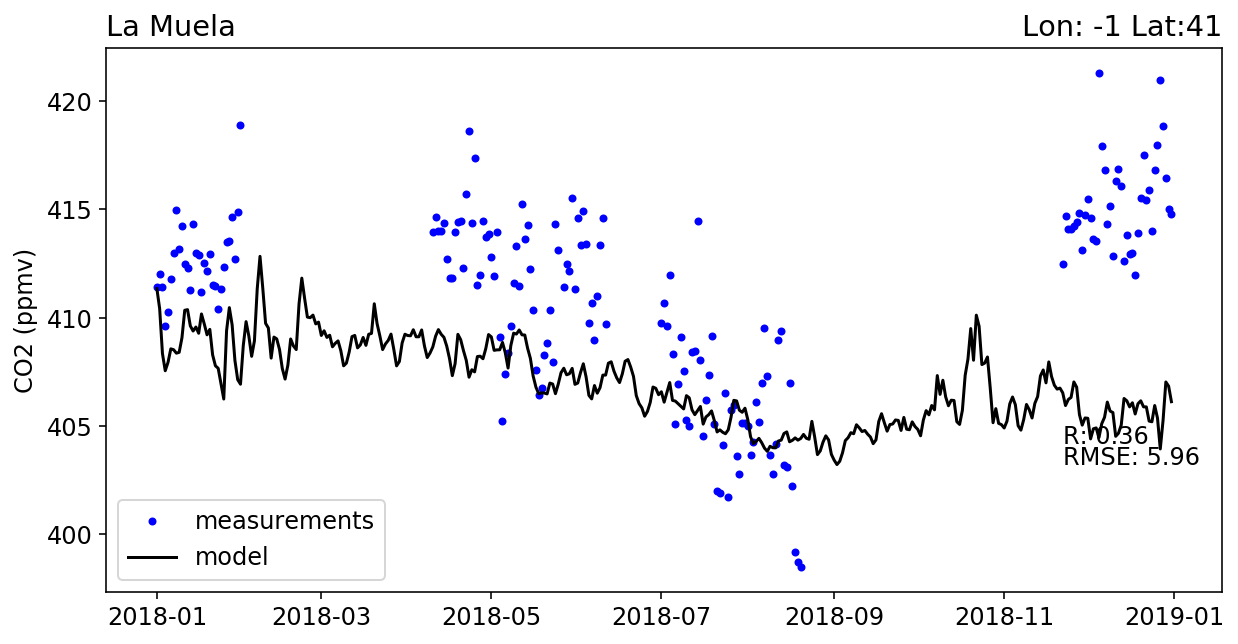

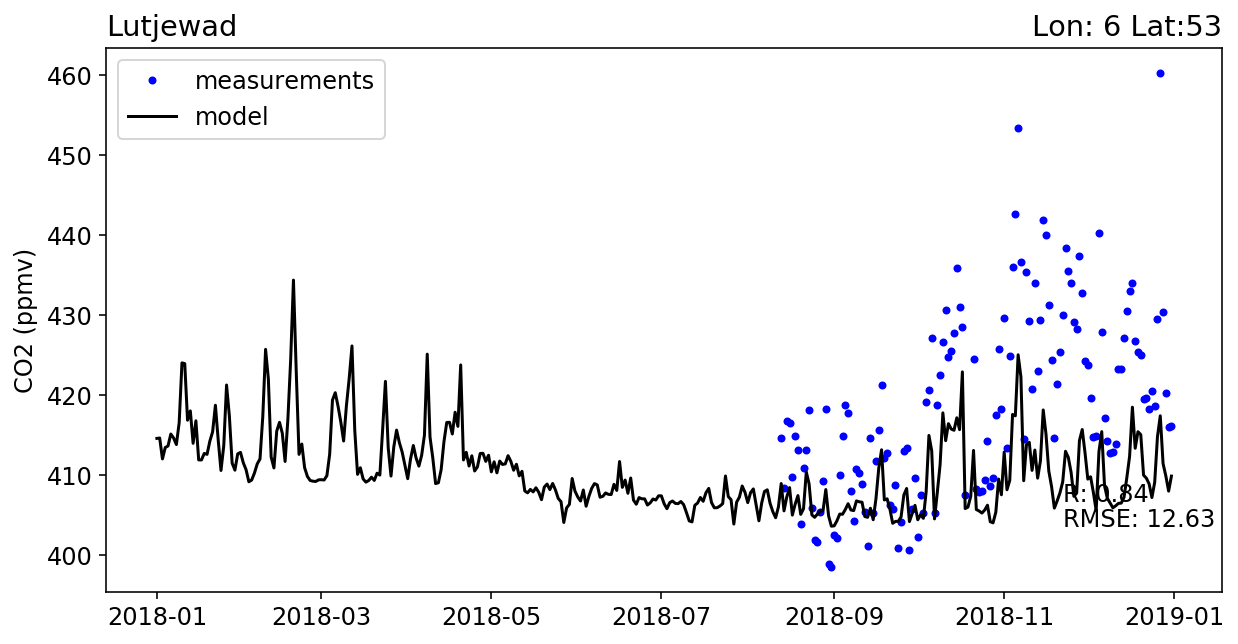

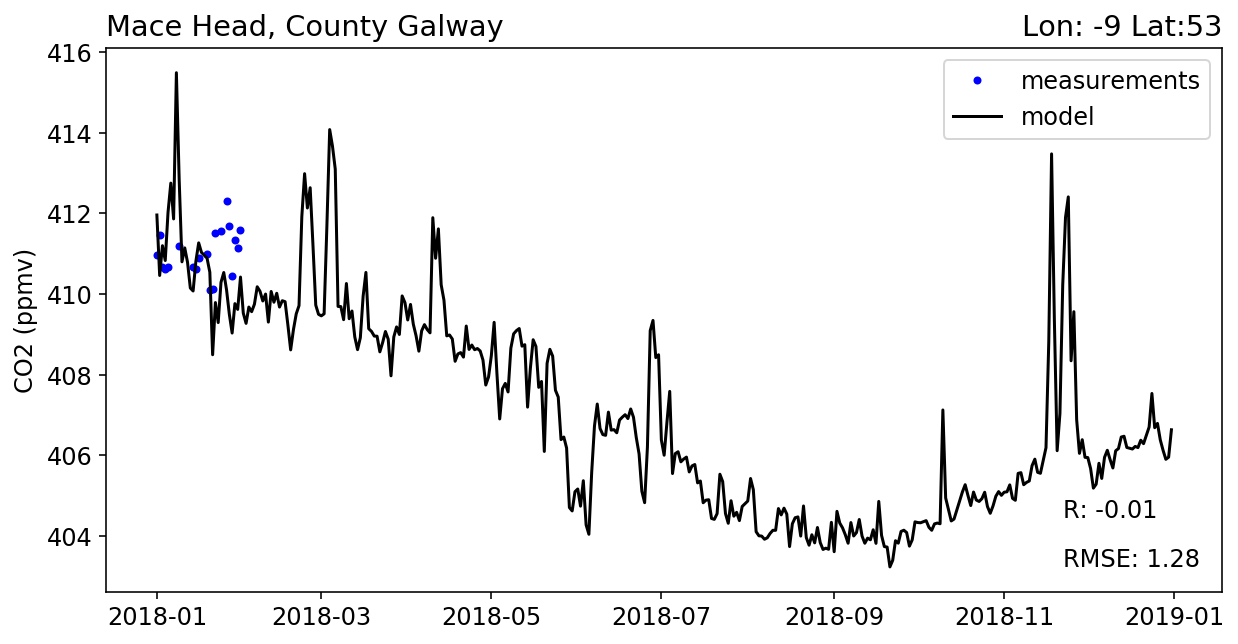

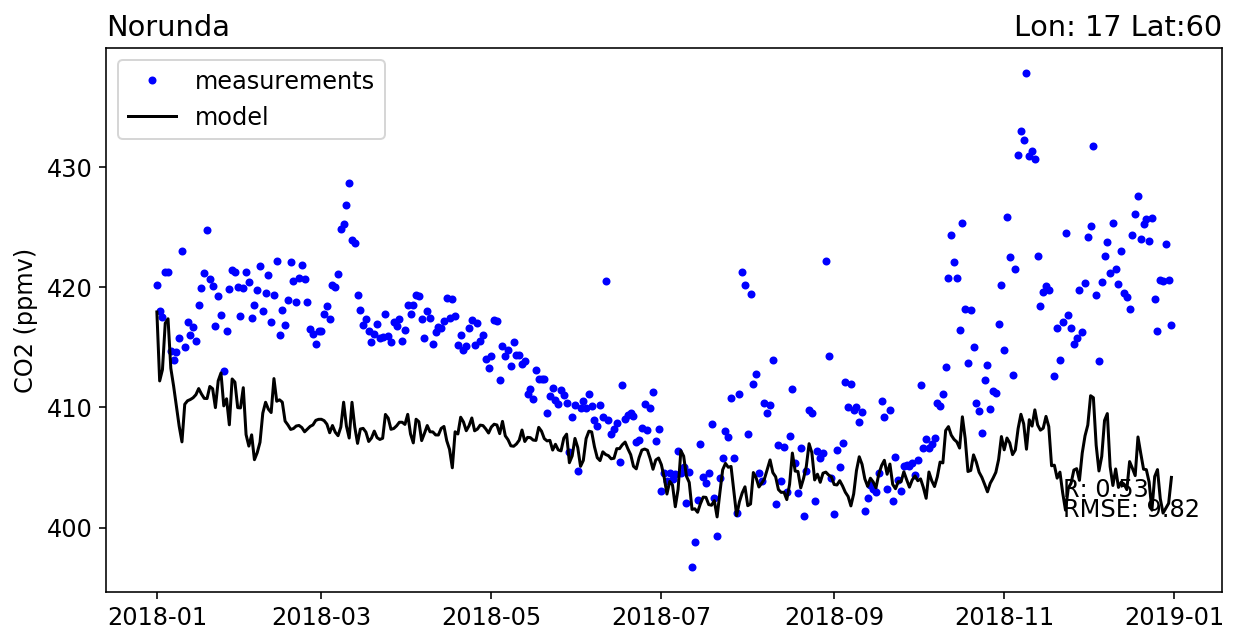

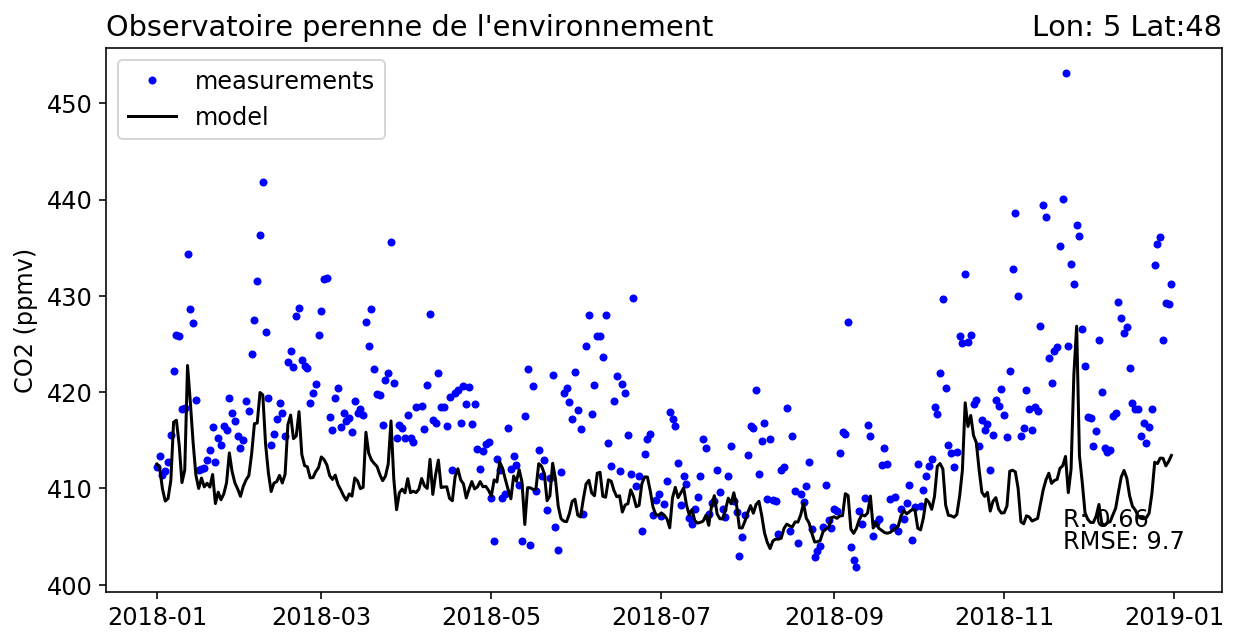

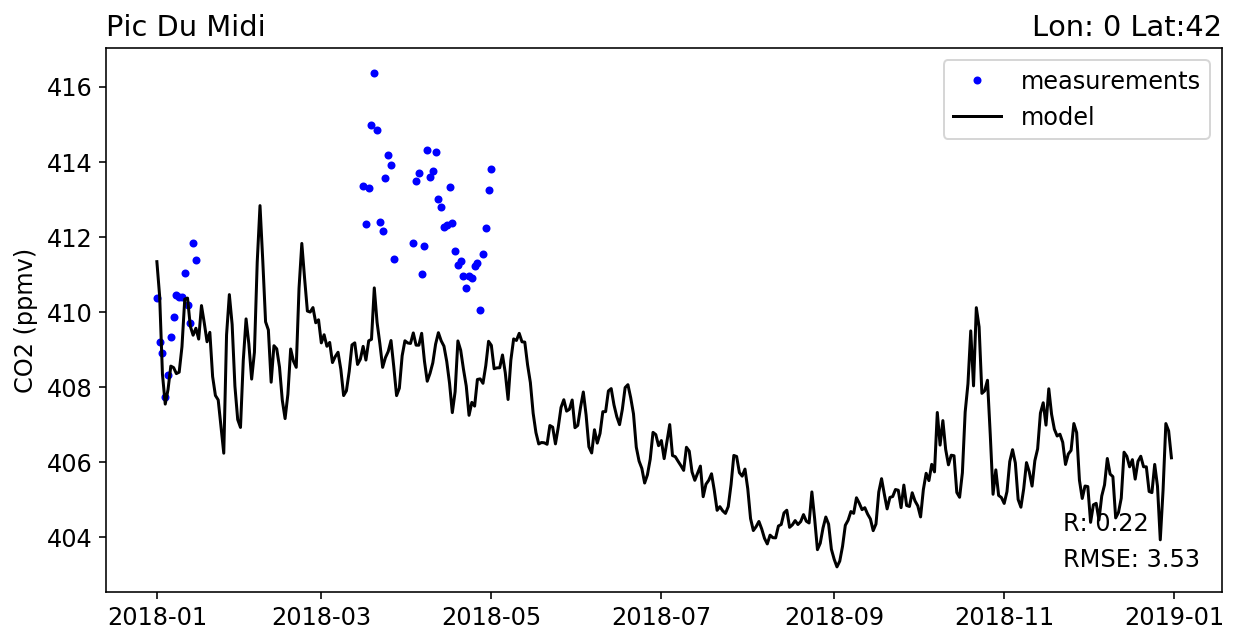

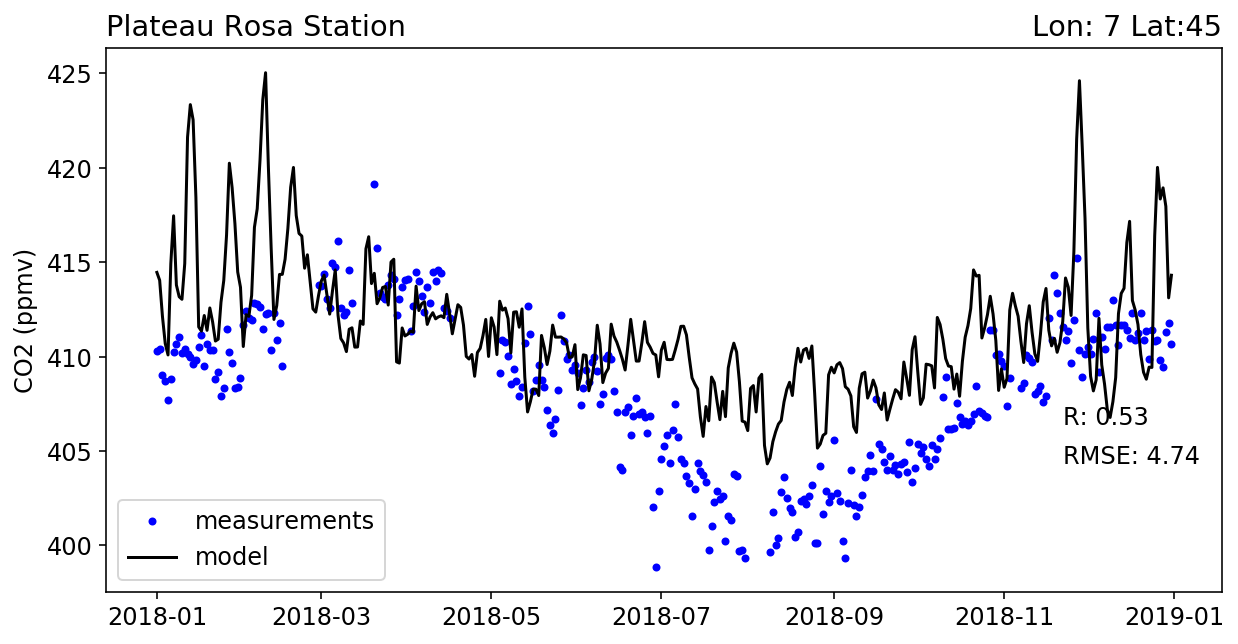

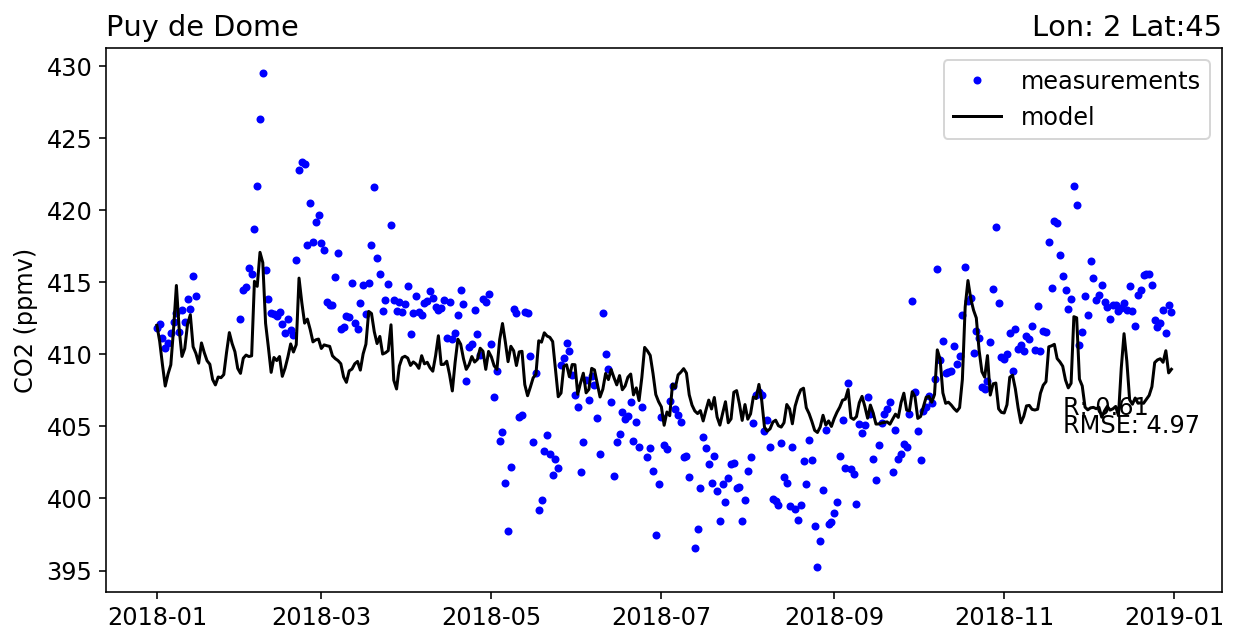

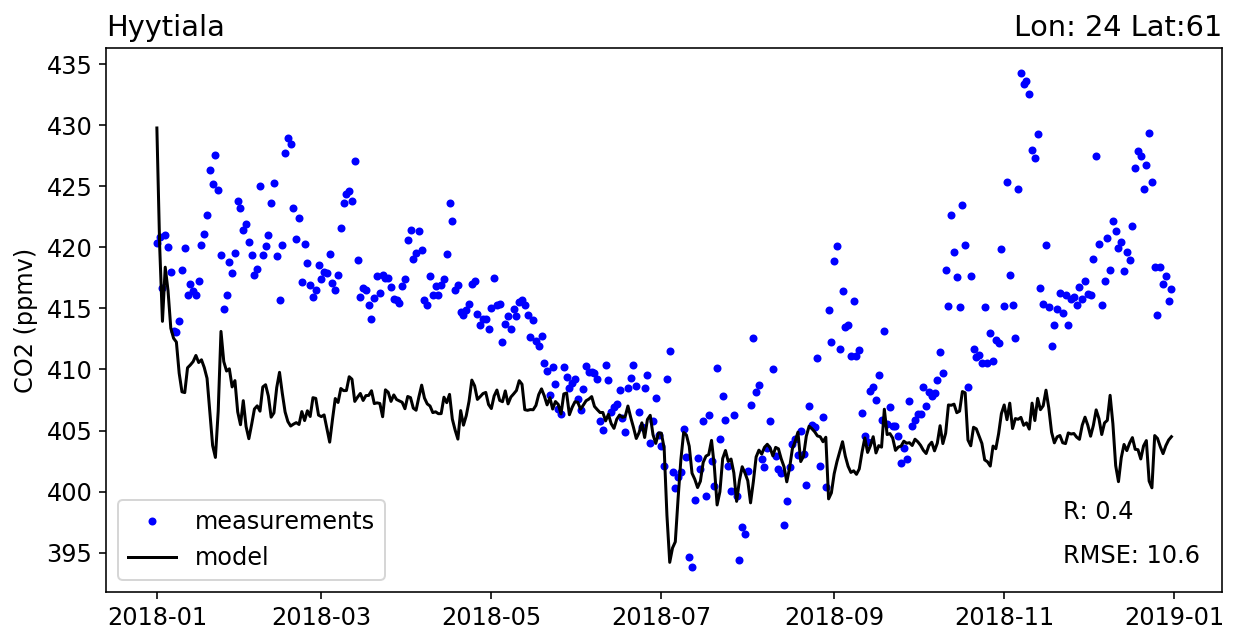

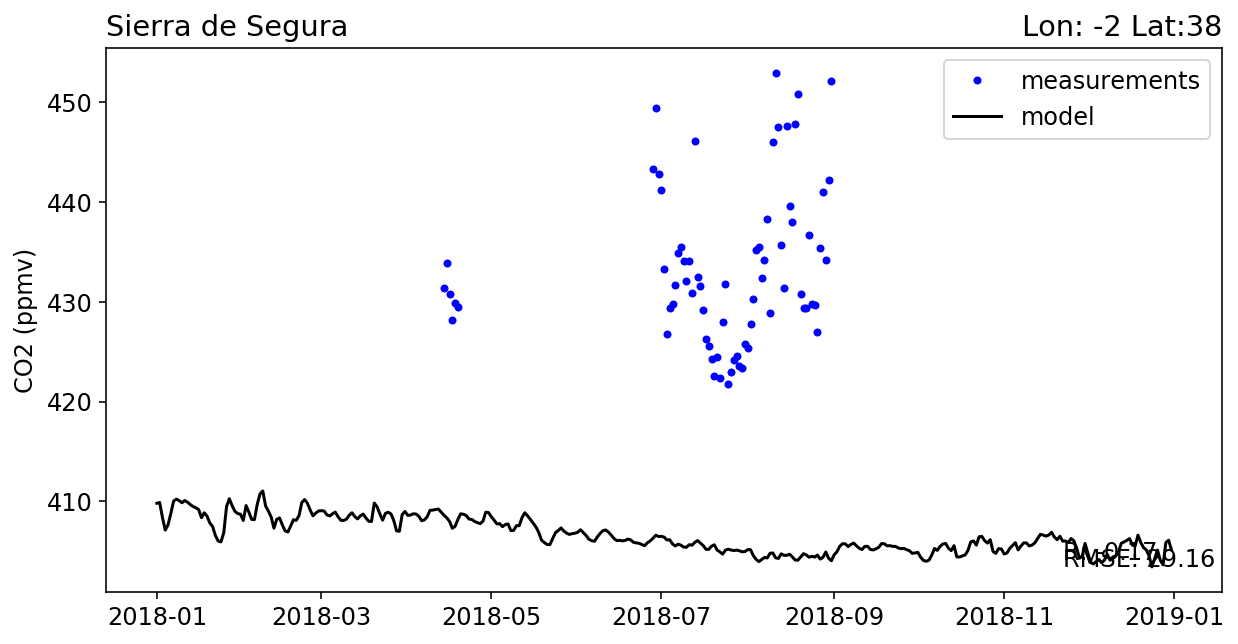

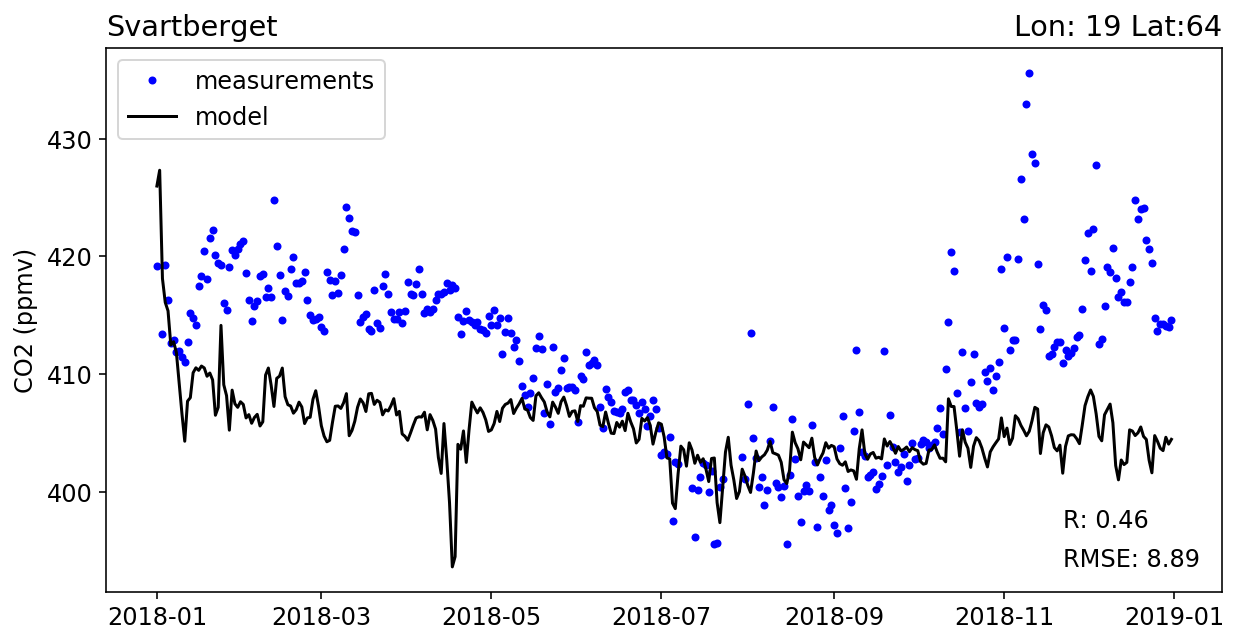

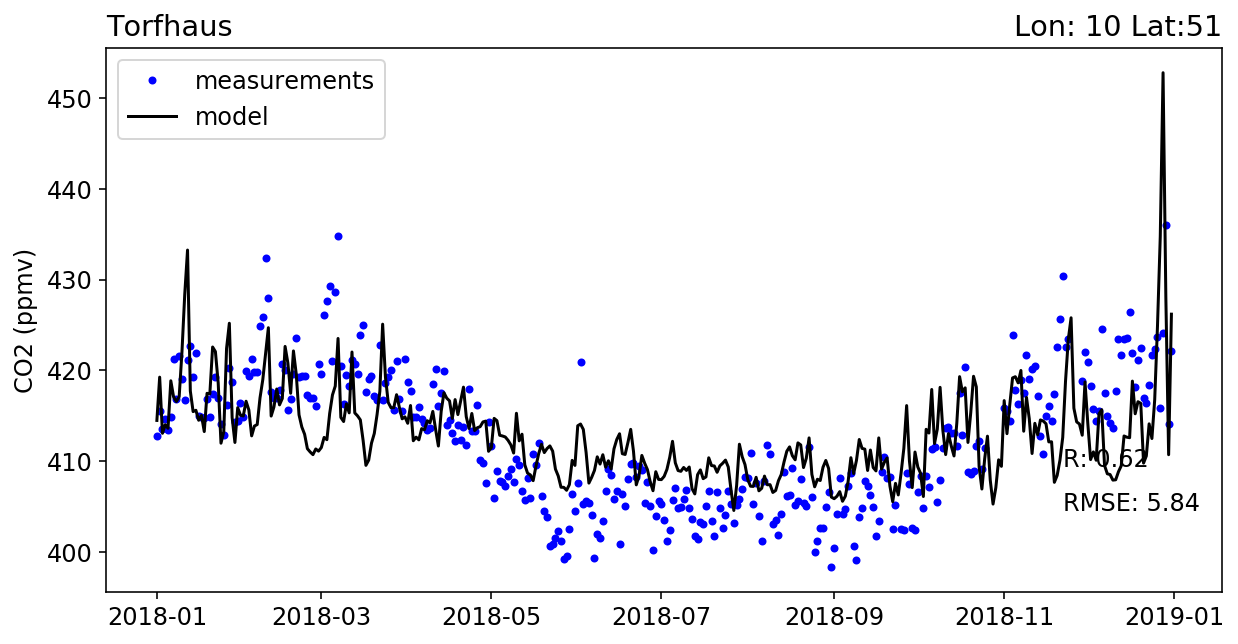

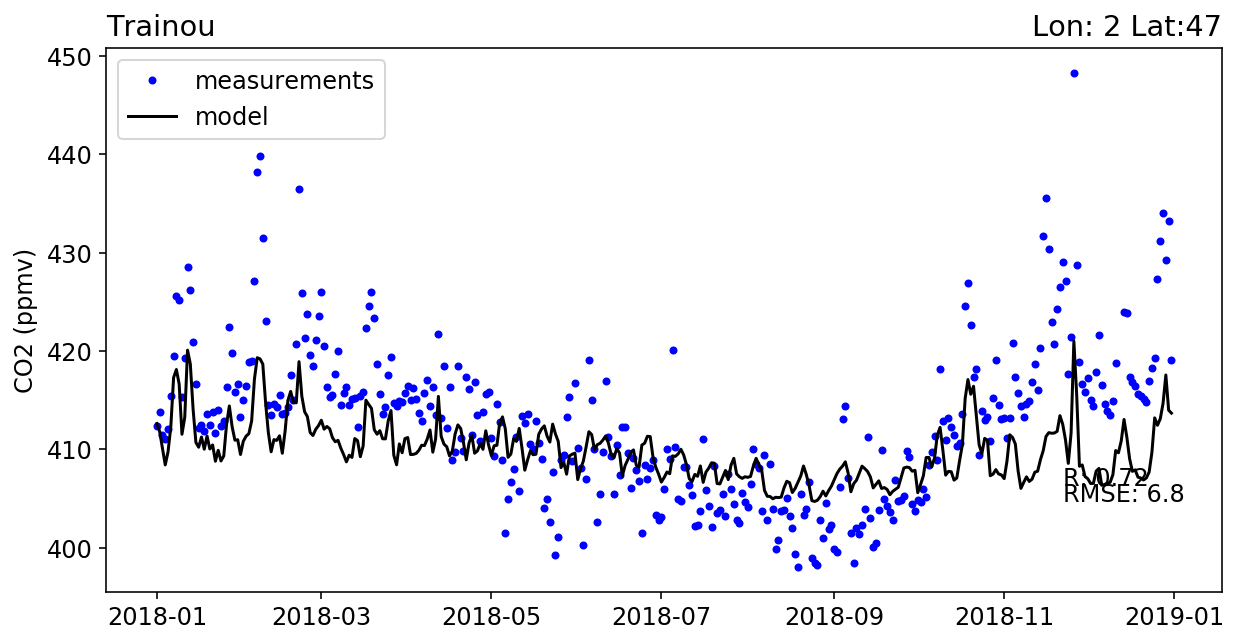

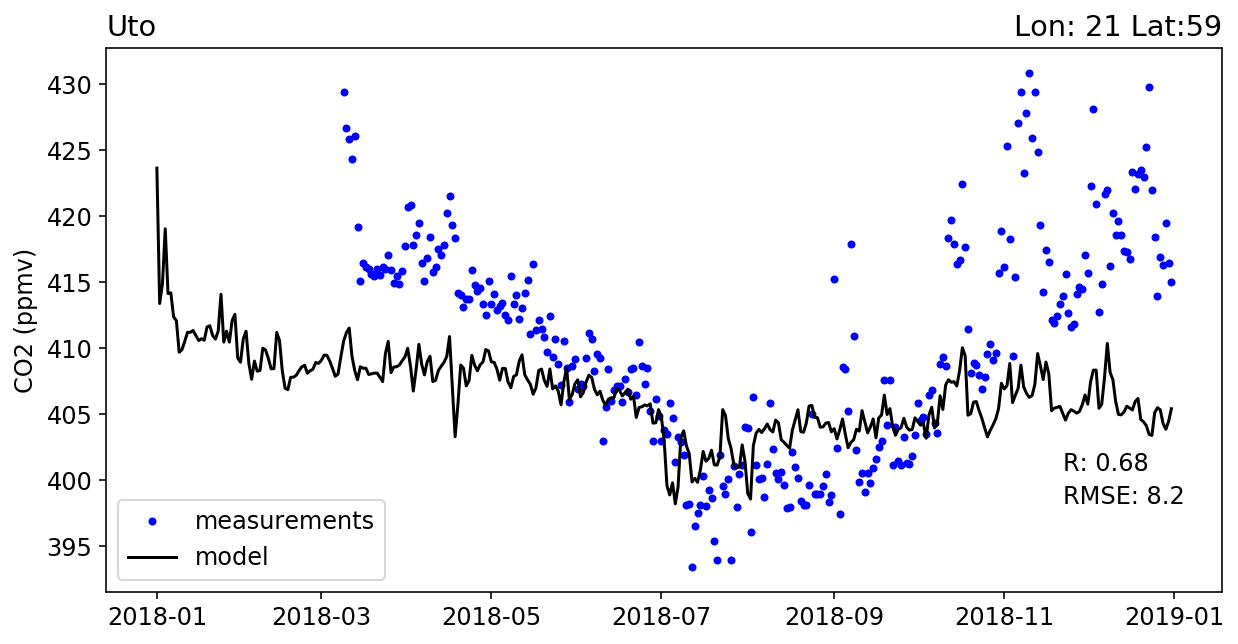

In [10]:
nm_loc = len(lines) # number of locations
for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds_obs = xr.open_dataset(file_dir + filename)
    lon = ds_obs.attrs['site_longitude']
    lat = ds_obs.attrs['site_latitude']
    # Europe domain
    if lat >= 35 and lat <= 65:
        if lon >= -11 and lon <= 36:
            # extract the nearest grid point model output
            ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6

            ds_obs['obs'] = ds_obs['co2']
            ds_obs['mod'] = ds_obs['co2']
            ds_obs['mod'].values = ts_model.values

            obs_series = ds_obs['obs'].values
            model_series = ds_obs['mod'].values
            R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))
            x = obs_series[~np.isnan(obs_series)]
            y = model_series[~np.isnan(obs_series)]
            rmse = np.sqrt(((y - x) ** 2).mean())
            format_R = float("{0:.2f}".format(R[0,1]))
            format_rmse = float("{0:.2f}".format(rmse))

            print('R is:', format_R, ' RMSE is: ', format_rmse)

            fig = plt.figure(figsize=[10,5])
            plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
            plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
            plt.legend()
            plt.title(ds_obs.attrs['site_name'], loc='left')
            plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
            plt.ylabel('CO2 (ppmv)')

            incr = 0.1*(max(ds_obs['mod'].values) - min(ds_obs['mod'].values))
            plt.text(x=ds_obs.date[-40], y=min(ds_obs['mod'].values)+incr, s='R: ' + str(format_R), size = 12)
            plt.text(x=ds_obs.date[-40], y=min(ds_obs['mod'].values), s='RMSE: ' + str(format_rmse), size = 12)

            fig.savefig(file_dir + '/plots/post/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)
